In [2]:
%matplotlib inline
import sys
import numpy as np
import math

import brfss
import thinkplot
import thinkstats2

import scatter

In [5]:
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

**Scatterplots** are used to plot two variables against one another.

**jitter** randomizes the data slightly for visualization

**saturation** occurs when there are many overlapping datapoints.  It hides data in the densest parts and gives disproportionate emphases to outliers.

```python
thinkplot.Scatter(heights, weights, alpha=0.2)
```

**hexbin plot** for very large datasets. divides graph into hexagonal bins and colors each bin according to how many points fall into it.  Outliers invisible

```python
thinkplot.HexBin(heights, weights)
```
###Characterizing relationships:

*  bin one variable and plot percentiles of the other


0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


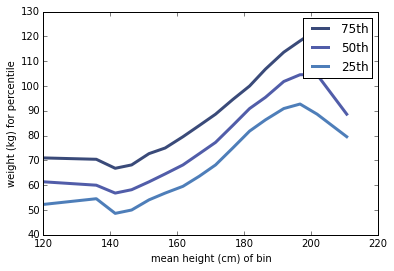

In [43]:
df = df.dropna(subset=['htm3', 'wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

for i, group in groups:
    print i, len(group)
    
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label='%dth' % percent
    thinkplot.Plot(heights, weights, label=label)
thinkplot.Show(xlabel='mean height (cm) of bin',
               ylabel='weight (kg) for percentile')



**a correlation** is a statistic intended to quantify the strength of a relationship between two variables.  Two challenges:

* variables not in same units

* even if same units, not in same distribution

#####Solutions:
* Transform each value to a **standard scores**, which is the number of standard deviations from the mean.  This transformation leads to the "Pearson product-moment correlation coefficient"

  If X is a series of n values, $x_i$, we can convert to standard scores by subtracting the mean and dividing by the standard deviation: $z_i = (x_i - \mu) / \sigma$.  Dividing by $\sigma$ **standardizes** the deviation, so the values of Z are dimensionless and their distribution has mean 0 and variance 1.

  If X is skewed or has outliers, so does Z.  In those cases, it is better to use percentile ranks.  Computing new variable, R, so $r_i$ is the rank of $x_i$, the distribution of R is uniform
  
  
* Transform each value to its **rank**, which is its index in the sorted list of values.  This transform leads to the "Spearman rank correlation coefficient"


**Covariance** is a measure of the tendency of two variables to vary together.  Dot product of deviations divided by length.  Maximized if the two vectors are identical.
$$
Cov(X,Y) = \frac{1}{n}\sum dx_i dy_i
$$
where
$$
dx_i = x_i - \bar{x}
$$
$$
dy_i = y_i - \bar{y}
$$


In [44]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    
    cov = np.dot(xs - meany, ys - meany) / len(xs)
    return cov

**Pearson's correlation** -- product of standard scores.  Also, covariance divided by product of standard deviations.  Always between -1 and 1.  When positive, directly proportional.

When near zero, there may be a **nonlinear** relationship.

This works well when relationship is linear and if the variables are roughly normal.  Not robust in the presence of outliers.

In [48]:

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = MeanVar(xs)
    meany, vary = MeanVar(ys)
    
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

**Spearman's rank correlation** alternative to PC that mitigates effect of outliers and skewed distributions.  First compute *ranks* for each item in both series.  Then compute correlation between the ranks.  Turns out to be a number between -1 and 1

In [49]:


def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

##Exercise

*  make scatterplot of birthweight versus mothers age
*  plot percentiles of birthweight versus mother's age
*  compute pearson's and Spearman's correlations
*  conclusions?

In [3]:
import nsfg

df = nsfg.ReadFemPreg()
print len(df)

13593


nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


In [4]:
df['totalwgt'] = df.birthwgt_lb + (df.birthwgt_oz / 16)


/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


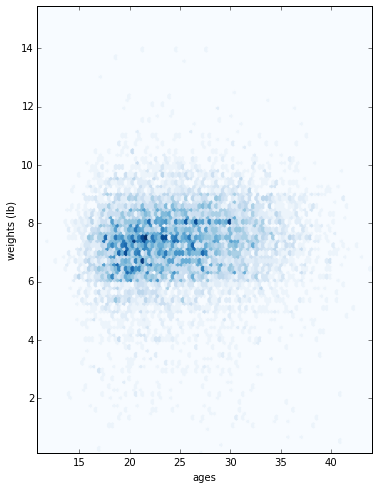

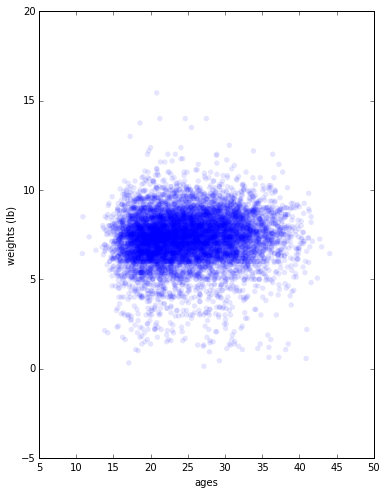

In [6]:
age_weight = df[['agepreg', 'totalwgt',]]
age_weight = age_weight.dropna(how='any')

ages = age_weight.agepreg
weights = age_weight.totalwgt


thinkplot.PrePlot(2, rows=1)
thinkplot.figure()
thinkplot.HexBin(ages, weights)
thinkplot.Config(xlabel='ages',
                 ylabel='weights (lb)')
thinkplot.figure()
thinkplot.Scatter(ages, weights, alpha=0.1)
thinkplot.Config(xlabel='ages',
                 ylabel='weights (lb)')


In [7]:
bins = np.arange(10,46, 3)
indices = np.digitize(age_weight.agepreg, bins)
groups = age_weight.groupby(indices)

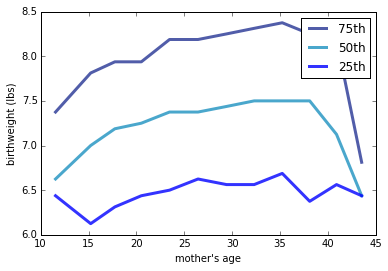

In [8]:
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt) for i, group in groups]

thinkplot.PrePlot()
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
thinkplot.Config(xlabel="mother's age",
                 ylabel="birthweight (lbs)",)
thinkplot.Show()

In [133]:

pearson = thinkstats2.Corr(ages, weights)
spearman = thinkstats2.SpearmanCorr(ages, weights)

print "pearson", pearson
print "spearman", spearman

pearson 0.0688339703541
spearman 0.0946100410966


##Conclusion:
An older mother is likely to have slightly heavier babies.  The effect is extremely small, and slightly more pronounced between the ages of 15 and 25.  The difference between the Pearson and the Spearman is pretty small, but exists and therefore suggests an influence of outliers, nonlinearity, or non-normalness.

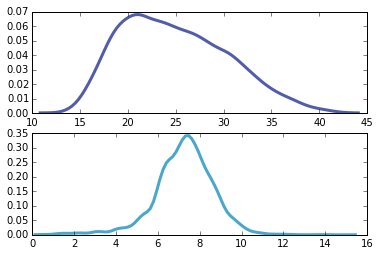

In [137]:
ages_pdf = thinkstats2.EstimatedPdf(ages)
weights_pdf = thinkstats2.EstimatedPdf(weights)

thinkplot.PrePlot(2, rows=2)
thinkplot.SubPlot(1)
thinkplot.Pdf(ages_pdf, label="ages")
thinkplot.SubPlot(2)
thinkplot.Pdf(weights_pdf, label="weights")